In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
%matplotlib inline

In [3]:
#!type resale_Lincoln_MKS.csv

In [4]:
# load dataset
df_MKS = pd.read_csv('resale_Lincoln_MKS.csv')
df_MKS.head()

,brand,config,drivetrain,exterior_color,interior_color,mileage,model,price,transmission,year
0,Lincoln,Base,AWD,Other,Black,46828,MKS,15995.0,Automatic,2013
1,Lincoln,Base,AWD,Brown,Black,143395,MKS,7950.0,Automatic,2009
2,Lincoln,Base,AWD,Beige,Other,83120,MKS,9710.0,Automatic,2009
3,Lincoln,Base,AWD,Black,Beige,96814,MKS,9499.0,Automatic,2009
4,Lincoln,Base,AWD,Brown,Black,57878,MKS,11900.0,Automatic,2013


In [5]:
## clean the dataset
# drop rows that have NaN
df_MKS = df_MKS.dropna(axis=0, how='any')

config
Base        439
EcoBoost     83
dtype: int64


Text(0.5, 1.0, 'Lincoln MKS-Configuration Plot')

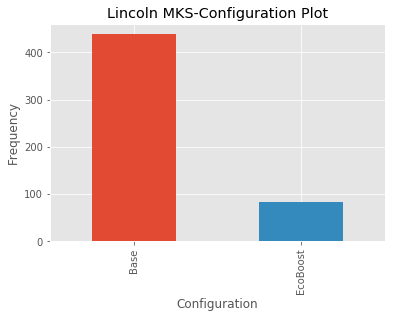

In [6]:
## Explore the dataset: Take care of the config: only care about Base and EcoBoost
df_MKS.replace(' BASE', ' Base', inplace = True)
df_MKS.replace(' Base', 'Base', inplace = True)
df_MKS.replace(' EcoBoost', 'EcoBoost', inplace = True)
df_MKS = df_MKS[df_MKS['config'].isin(['Base', 'EcoBoost']) ]
group_config = df_MKS.groupby('config')
print(group_config.size())
df_MKS['config'].value_counts().plot(kind='bar')
plt.xlabel('Configuration')
plt.ylabel('Frequency')
plt.title('Lincoln MKS-Configuration Plot')

exterior_color
Black     147
White     105
Brown      80
Silver     58
Red        48
dtype: int64


Text(0.5, 1.0, 'Lincoln MKS-Exterior Color')

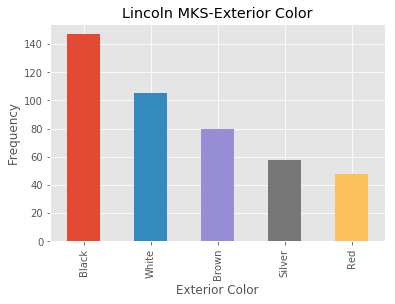

In [7]:
## Explore the dataset: Take care of the exterior_color: ['Black', 'White', 'Brown', 'Silver', 'Red', 'Gray', 'Beige', 'Other', 'Blue']
df_MKS = df_MKS[df_MKS['exterior_color'].isin(['Black', 'White', 'Brown', 'Silver', 'Red'])]
group_ext_color = df_MKS.groupby('exterior_color')
print(group_ext_color.size().sort_values(ascending = False))
#plt.hist(df_MKS['exterior_color'])
df_MKS['exterior_color'].value_counts().plot(kind='bar')
plt.xlabel('Exterior Color')
plt.ylabel('Frequency')
plt.title('Lincoln MKS-Exterior Color')

interior_color
Beige    199
Black    167
Other     56
dtype: int64


Text(0.5, 1.0, 'Lincoln MKS-Interior Color')

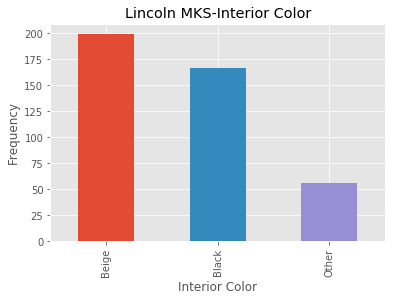

In [8]:
## Explore the dataset: Take care of the interior_color: []
df_MKS = df_MKS[df_MKS['interior_color'].isin(['Beige', 'Black', 'Other'])]
group_int_color = df_MKS.groupby('interior_color')
print(group_int_color.size().sort_values(ascending = False))
df_MKS['interior_color'].value_counts().plot(kind='bar')
plt.xlabel('Interior Color')
plt.ylabel('Frequency')
plt.title('Lincoln MKS-Interior Color')

drivetrain
FWD    226
AWD    196
dtype: int64


Text(0.5, 1.0, 'Lincoln MKS-Drivetrain')

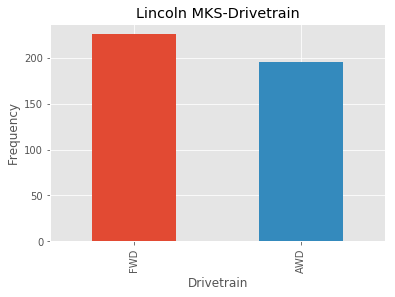

In [9]:
## Explore the dataset: Take care of the drivetrain:
group_dt = df_MKS.groupby('drivetrain')
print(group_dt.size().sort_values(ascending = False))
df_MKS['drivetrain'].value_counts().plot(kind='bar')
plt.xlabel('Drivetrain')
plt.ylabel('Frequency')
plt.title('Lincoln MKS-Drivetrain')

year
2015    137
2013     74
2016     70
2014     45
2009     42
2010     23
2012     19
2011     12
dtype: int64


Text(0.5, 1.0, 'Lincoln MKS-Year')

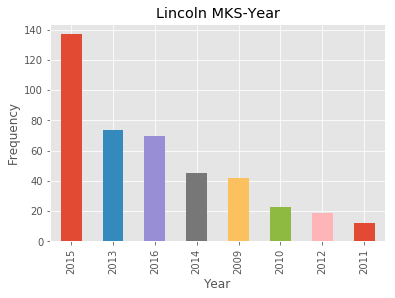

In [10]:
## Explore the dataset: Take care of the year:
group_yr = df_MKS.groupby('year')
print(group_yr.size().sort_values(ascending = False))
df_MKS['year'].value_counts().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Lincoln MKS-Year')

Text(0.5, 1.0, 'Lincoln MKS-Price vs Mileage')

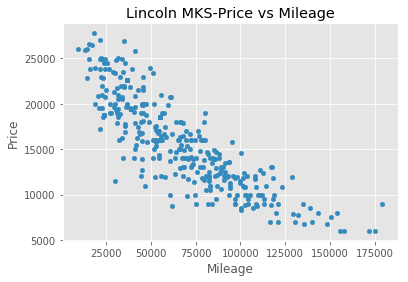

In [11]:
# scatter(x='Mileage', y='Price')
df_MKS.plot(kind='scatter',x='mileage', y='price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Lincoln MKS-Price vs Mileage')

Text(0.5, 1.0, 'Lincoln MKS-Price vs Year')

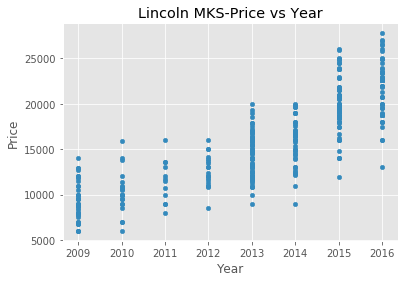

In [12]:
# scatter(x='Year', y='Price')
df_MKS.plot(kind='scatter',x='year', y='price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Lincoln MKS-Price vs Year')

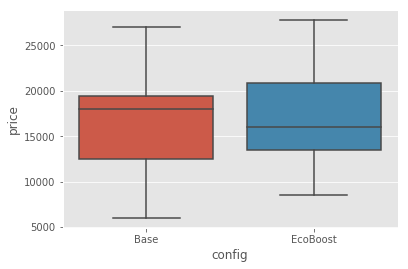

In [13]:
import seaborn as sns
# boxplot of price by config
sns.boxplot(x='config', y='price', data=df_MKS)

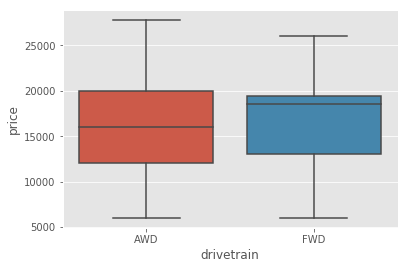

In [14]:
# boxplot of price by drivetrain
sns.boxplot(x='drivetrain', y='price', data=df_MKS)

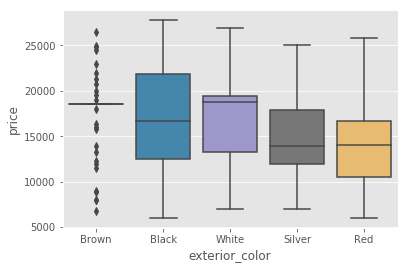

In [15]:
# boxplot of price by color
sns.boxplot(x='exterior_color', y='price', data=df_MKS)

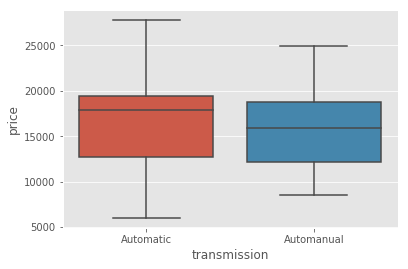

In [16]:
# boxplot of price by transmission
sns.boxplot(x='transmission', y='price', data=df_MKS)

In [17]:
## Models 
# Linear Regression on Price vs Year
from sklearn.linear_model import LinearRegression
X = df_MKS['year'].values.reshape(-1, 1)
y = df_MKS['price'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)
price_2019 = reg.predict(np.array([2019]).reshape(-1, 1))
price_2016 = reg.predict(np.array([2016]).reshape(-1, 1))
price_2014 = reg.predict(np.array([2014]).reshape(-1, 1))
print(price_2016/price_2019)
print(price_2014/price_2019)

[[1826.50916482]]
[-3661335.30372417]
[[0.79233752]]
[[0.65389587]]


In [18]:
# Linear Regression on Price vs Mileage
from sklearn.linear_model import LinearRegression
X = df_MKS['mileage'].values.reshape(-1, 1)
y = df_MKS['price'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)
price_0 = reg.predict(np.array([0]).reshape(-1, 1))
price_45k = reg.predict(np.array([45000]).reshape(-1, 1))
price_75k = reg.predict(np.array([75000]).reshape(-1, 1))
print(price_45k/price_0)
print(price_75k/price_0)

[[-0.13022405]]
[24636.04955613]
[[0.76213385]]
[[0.60355641]]


In [19]:
# PCA
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

#df_MKS.corr()
#Get rid of 'model', 'brand', 'interior_color', 'transmission'
df_MKS = df_MKS.drop(['model'], axis= 1)
df_MKS = df_MKS.drop(['brand'], axis= 1)
df_MKS = df_MKS.drop(['interior_color'], axis= 1)
df_MKS = df_MKS.drop(['transmission'], axis= 1)
df_MKS.head()

,config,drivetrain,exterior_color,mileage,price,year
1,Base,AWD,Brown,143395,7950.0,2009
3,Base,AWD,Black,96814,9499.0,2009
4,Base,AWD,Brown,57878,11900.0,2013
5,Base,AWD,Brown,80298,15995.0,2015
9,Base,FWD,Brown,55039,18500.0,2015


In [20]:
#Encoding data
labelDict = {}
for feature in df_MKS:
    le = preprocessing.LabelEncoder()
    le.fit(df_MKS[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df_MKS[feature] = le.transform(df_MKS[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue    

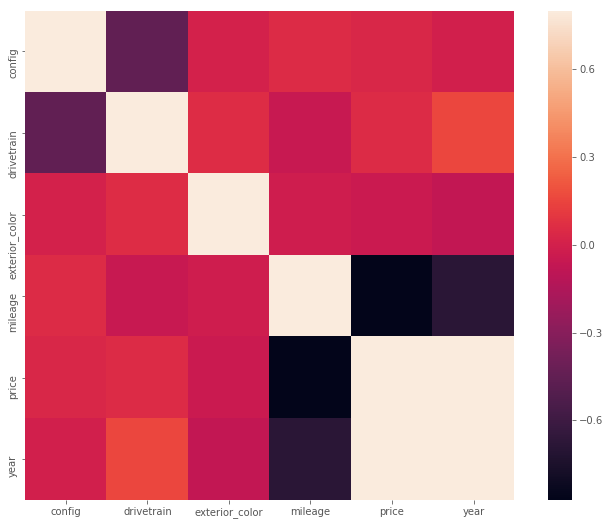

In [21]:
#correlation matrix
corrmat = df_MKS.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()